## Simple gradient based learner for L2 regularized logistic with 2-dim data input

Jordy Trilaksono 

June 30, 2020

Description: This is part of the 3rd assignment of Advanced Machine Learning class. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [40]:
# prepare dataset
np.random.seed(777)
n = 40
omega = np.random.randn()
noise = 0.8 * np.random.randn(n)
lam = 0.01
x = np.random.randn(n, 2)
y = 2 * (omega * x[:,0] + x[:,1] + noise > 0) - 1

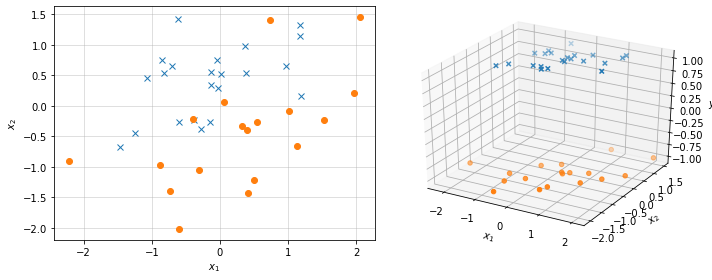

In [111]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.plot(x[:,0][y>0], x[:,1][y>0], 'x')
ax1.plot(x[:,0][y<0], x[:,1][y<0], 'o')

ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax1.grid(alpha=0.5)

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(x[:,0][y>0], x[:,1][y>0], y[y>0], marker='x')
ax2.scatter(x[:,0][y<0], x[:,1][y<0], y[y<0], marker='o')

ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')
ax2.set_zlabel('$y$')

plt.tight_layout()
#plt.savefig('sampling.png')
plt.show()

In [110]:
def loss(y,x,w1,w2,lam,n):
    J = 1/n  * np.sum(np.log(1 + np.exp(-y * (w1*x[:,0] + w2*x[:,1])))) + lam*(w1**2+w2**2)
    return J
    
## gradient discent
num_iter = 300
weight = np.array([3.,0.])
alpha = 1

direction = np.zeros(2)
loss_tracker = []
weight_tracker = np.zeros(2)
lip = 0.25 * max(x[:,0]**2);

for t in range(1,num_iter+1):
    posterior = 1 / (1 + np.exp(-y * (weight[0]*x[:,0] + weight[1]*x[:, 1])))
    direction[0] =  1 / n * np.sum((1 - posterior) * y * x[:,0]) + 2 * lam * weight[0]
    direction[1] =  1 / n * np.sum((1 - posterior) * y * x[:,1]) + 2 * lam * weight[1]
    #loss = loss(y,x,weight,lam,n)
    #loss = 1/n  * np.sum(np.log(1 + np.exp(-y * (weight[0]*x[:,0] + weight[1]*x[:,1])))) + lam*np.sum(weight)**2
    weight_tracker = np.vstack([weight_tracker, weight])
    loss_tracker.append(loss(y,x,weight[0],weight[1],lam,n))
    weight += alpha * 1.0 / np.sqrt(t) / lip * direction
    
print('Optimal weight:', weight)

Optimal weight: [-1.28208138  2.13676305]


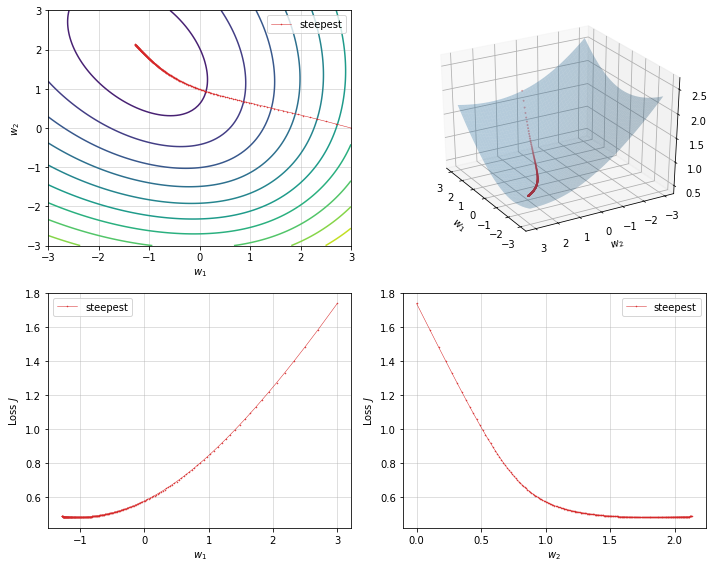

In [112]:
def loss(y,x,w1,w2,lam,n):
    J = 0
    for i in range(n):
        J += np.log(1 + np.exp(-y[i] * (w1*x[i][0] + w2*x[i][1])))
    J = J/n
    J += lam*(w1**2+w2**2)
    return J

w = np.linspace(-3,3,100)
mesh_w1, mesh_w2 = np.meshgrid(w,w)
mesh_loss = loss(y,x,mesh_w1,mesh_w2,lam,n)

fig = plt.figure(figsize=(10,8))

ax1 = fig.add_subplot(221)
ax1.contour(mesh_w1, mesh_w2, mesh_loss, levels=10)
ax1.plot(weight_tracker.T[0][1:], weight_tracker.T[1][1:], 'C3-o', linewidth=0.5, markersize=0.5, label='steepest')
ax1.set_xlabel('$w_1$')
ax1.set_ylabel('$w_2$')
ax1.grid(alpha=0.5)
ax1.legend()

ax2 = fig.add_subplot(222, projection='3d')
ax2.plot_surface(mesh_w1, mesh_w2, mesh_loss, alpha=0.3)
ax2.scatter(weight_tracker.T[0][1:], weight_tracker.T[1][1:], loss_tracker, s=0.5*4, marker='o', linewidth=0.5, label='steepest', color='C3')
ax2.view_init(azim=150)
ax2.set_xlabel('$w_1$')
ax2.set_ylabel('$w_2$')
ax2.set_zlabel('Loss $J$')

ax3 = fig.add_subplot(223)
ax3.plot(weight_tracker.T[0][1:], loss_tracker, 'C3-o', linewidth=0.5, markersize=0.5, label='steepest')
ax3.set_xlabel('$w_1$')
ax3.set_ylabel('Loss $J$')
ax3.grid(alpha=0.5)
ax3.legend()

ax3 = fig.add_subplot(224)
ax3.plot(weight_tracker.T[1][1:], loss_tracker, 'C3-o', linewidth=0.5, markersize=0.5, label='steepest')
ax3.set_xlabel('$w_2$')
ax3.set_ylabel('Loss $J$')
ax3.grid(alpha=0.5)
ax3.legend()

plt.tight_layout()
#plt.savefig('steepest.png')
plt.show()